In [1]:
import uproot
import boost_histogram as bh
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep as hep
import awkward1 as ak
import pandas as pd
import numpy as np
import seaborn as sns

def set_sns_color(*args):
    sns.palplot(sns.color_palette(*args))
    sns.set_palette(*args)

#===========================================load config file====================================================================
import sys,os
sys.path.append("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/lib")
from utils import *

import yaml
sf_particleNet_signal = {}
with open('/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/cards/NetSF_signal_2016Legacy.yml') as f:
    sf_particleNet_signal = yaml.safe_load(f)
config = {}
with open("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/cards/config_UL16.yml") as f:
    config = yaml.safe_load(f)
#======================================================================================================================================================
branchs = 'GEN_H1_mass'
year = '2016'

In [2]:
use_helvet = True  ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

In [3]:
def reshape(histo,mean,width):
    h = bh.Histogram(bh.axis.Regular(nbins, xmin, xmax))
    h.fill(np.random.normal(loc=mean, scale=width, size=int(histo.view().value.sum())))
    reshape_weight = h.view()/histo.view().value
    np.nan_to_num(reshape_weight,0)
    return reshape_weight

This is ggh125
This is ggh300
This is ggh350
This is ggh400
This is ggh450
This is ggh500
This is ggh550
This is ggh600
This is ggh700
This is ggh800
This is ggh900
This is ggh1000
This is ggh1500
This is ggh2500
This is ggh3000


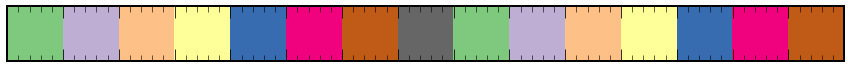

In [4]:
branchs = ['GEN_H1_mass','EventWeight','foundZ1LCandidate','foundTTCRCandidate','foundZ2JCandidate','foundZ2MergedCandidata','foundTTCRCandidate','passedfullmerged','passedfullresolved','particleNetZvsQCD','passedNassociated',
                        'massmerged','ptmerged','mass2jet',
                        'mass2l2jet', 'mass2lj',]
samples = ['ggh125','ggh300','ggh350','ggh400','ggh450','ggh500','ggh550','ggh600','ggh700','ggh800','ggh900','ggh1000','ggh1500','ggh2500','ggh3000']
massList = [125,300,350,400,450,500,550,600,700,800,900,1000,1500,2500,3000]
# Set plot color
color_order = sns.color_palette('Accent', len(samples))
set_sns_color(color_order)
####
#sig_arr, sumWeight = extractSpecialBranch(config,year,samples,branchs)
branchs = config['var_read_lists'].append('GEN_H1_mass')
sig_arr, sumWeight = extractSpecialBranch(config,year,samples,branchs)

# GEN Raw mass Higgs

In [5]:
####Get Gen leval histograms
sig_hist_dir = {}
sig_hist = []
nbins, xmin, xmax = 400,0,4000
edge = np.linspace(xmin, xmax, nbins+1)
with uproot.recreate("Histos_gen.root") as f:
    for i,sample in enumerate(samples):
        print(sample)
        #temp_arr = sig_arr[sample]
        weights = np.ones_like(sig_arr[sample]['GEN_H1_mass'])
        sig_hist.append(get_hist(sig_arr[sample]['GEN_H1_mass'],weights,nbins,xmin,xmax))
        sig_hist_dir[sample] = get_hist(sig_arr[sample]['GEN_H1_mass'],weights,nbins,xmin,xmax)

        #reshape
        #re_weight = reshape(sig_hist_dir[sample],massList[i],width)
        #sig_hist_dir[sample].view().value = (sig_hist_dir[sample].view().value)*re_weight
        
        f[sample] = sig_hist_dir[sample]

ggh125
ggh300
ggh350
ggh400
ggh450
ggh500
ggh550
ggh600
ggh700
ggh800
ggh900
ggh1000
ggh1500
ggh2500
ggh3000


[INFO] DONE


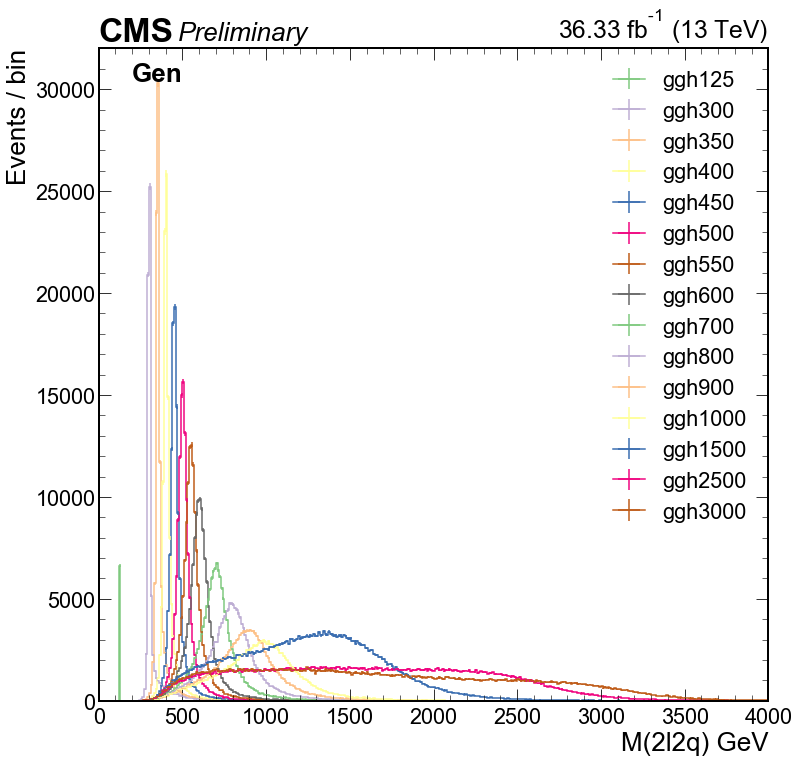

In [7]:
###plot Gen Higgs mass
f = plt.figure(figsize=(12,12))
ax = f.add_subplot()
hep.cms.label(data=True, llabel='Preliminary',year=year,rlabel=r'%s $fb^{-1}$ (13 TeV)'%config['lumi'][year], fontname='sans-serif')
ax.set_xlim(xmin, xmax); ax.set_ylabel('Events / bin', ha='right', y=1.0)
ax.set_xlabel(r'M(2l2q) GeV', ha='right', x=1.0)
plot_hist(sig_hist,label=[ var for var in samples])
ax.text(0.05, 0.95, 'Gen', transform=ax.transAxes, fontweight='bold') 
plt.legend()
plt.savefig(f'GenH.png')
print('[INFO] DONE')


# Raw Reco Plots

This is merged
eff = 0.0015094339622641509 in ggh125 with merged
eff = 0.01527196951315245 in ggh300 with merged
eff = 0.016883024757040507 in ggh350 with merged
eff = 0.030769773326397645 in ggh400 with merged
eff = 0.07297392117880949 in ggh450 with merged
eff = 0.13603928489219674 in ggh500 with merged
eff = 0.1985254516077381 in ggh550 with merged
eff = 0.23744116113456332 in ggh600 with merged
eff = 0.2973870728869142 in ggh700 with merged


/tmp/ipykernel_22630/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


eff = 0.34472519409793223 in ggh800 with merged
eff = 0.37375766228325136 in ggh900 with merged
eff = 0.3965995145614959 in ggh1000 with merged
eff = 0.46720586544842096 in ggh1500 with merged
eff = 0.5223504633957589 in ggh2500 with merged
eff = 0.5268578374407686 in ggh3000 with merged
[INFO] DONE
This is resolved
eff = 0.023547169811320753 in ggh125 with resolved
eff = 0.03057248476371266 in ggh300 with resolved
eff = 0.034059931697726975 in ggh350 with resolved
eff = 0.06563042769103268 in ggh400 with resolved
eff = 0.14859582003775665 in ggh450 with resolved
eff = 0.25844394997314507 in ggh500 with resolved
eff = 0.35856417123975604 in ggh550 with resolved
eff = 0.4131184777251591 in ggh600 with resolved
eff = 0.46932543460629783 in ggh700 with resolved
eff = 0.5027840003286163 in ggh800 with resolved


/tmp/ipykernel_22630/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


eff = 0.4543609750496616 in ggh900 with resolved
eff = 0.3693613259474976 in ggh1000 with resolved
eff = 0.11895292203034856 in ggh1500 with resolved
eff = 0.05495006004384774 in ggh2500 with resolved
eff = 0.053381750687596645 in ggh3000 with resolved
[INFO] DONE
This is all
eff = 0.024 in ggh125 with all
eff = 0.033384239898377174 in ggh300 with all
eff = 0.03620831179886298 in ggh350 with all
eff = 0.06931574724703103 in ggh400 with all
eff = 0.15585478724292898 in ggh450 with all
eff = 0.2713573237167191 in ggh500 with all
eff = 0.37671581827974204 in ggh550 with all
eff = 0.4369254505324962 in ggh600 with all
eff = 0.5108572234563983 in ggh700 with all
eff = 0.5620722465961553 in ggh800 with all
eff = 0.5674790646290954 in ggh900 with all
eff = 0.5564259595380254 in ggh1000 with all
eff = 0.5265370069794348 in ggh1500 with all


/tmp/ipykernel_22630/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


eff = 0.5475451673044486 in ggh2500 with all
eff = 0.5503278155598327 in ggh3000 with all
[INFO] DONE


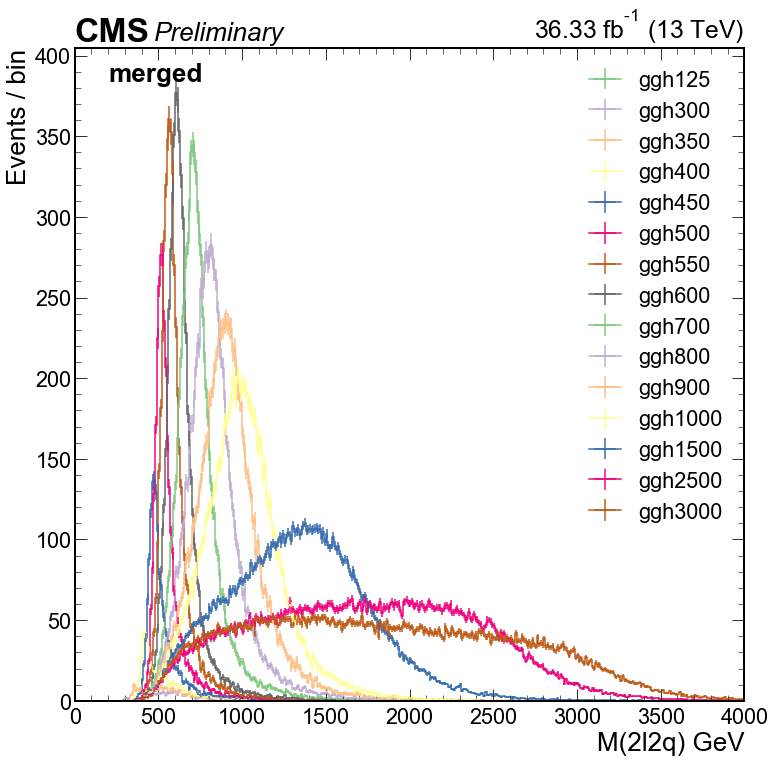

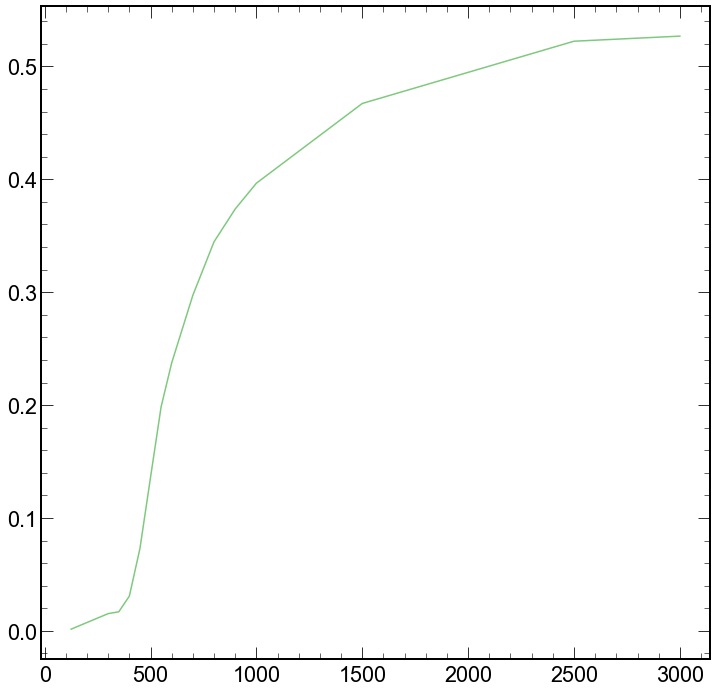

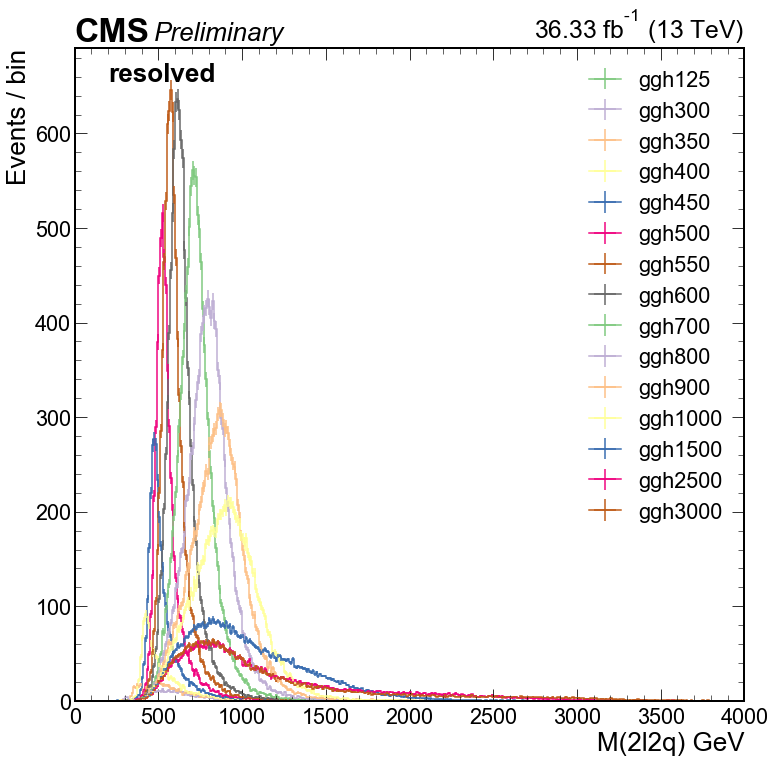

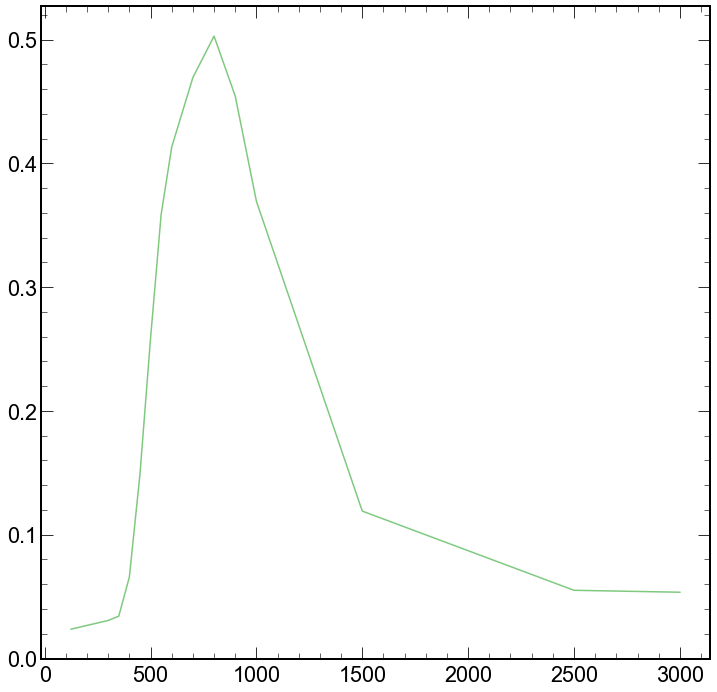

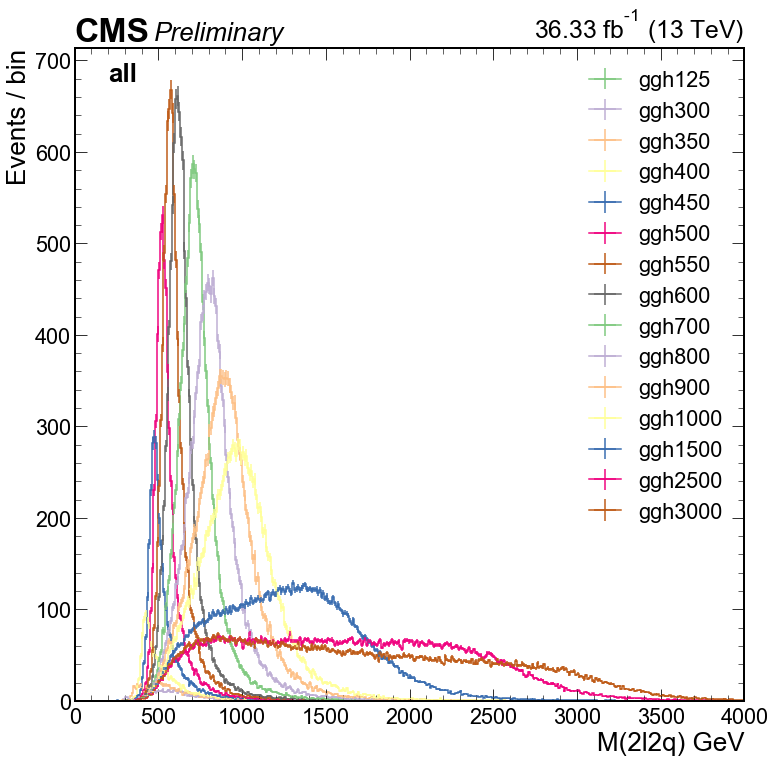

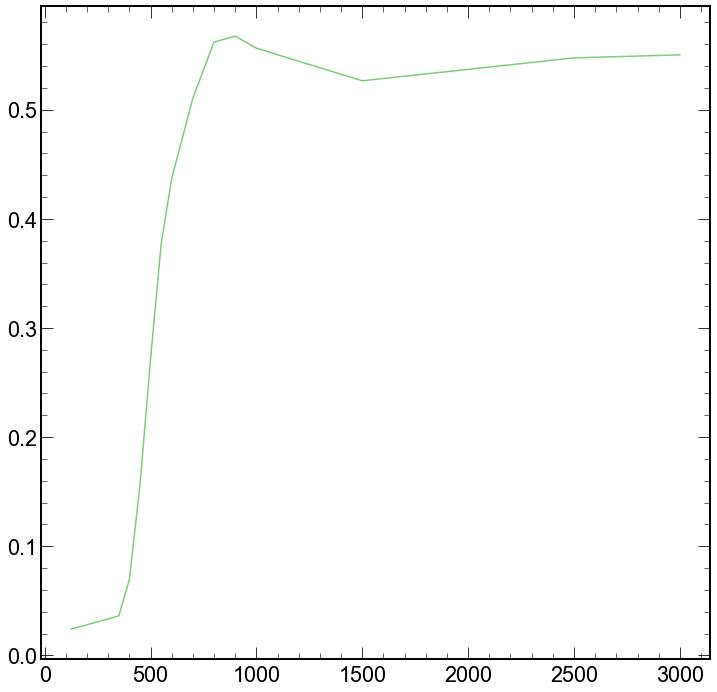

In [15]:
sig_arr_cut = {}
sig_hist_cut = {}
eff = {}
selections = {'merged':'((massmerged>70) & (massmerged<105)) & (particleNetZvsQCD>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)',
            'resolved':'((mass2jet>70) & (mass2jet<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True)',
            'all': '(((massmerged>70) & (massmerged<105)) & (particleNetZvsQCD>0.9) & (foundZ1LCandidate==True) & (foundZ2MergedCandidata==True)) | (((mass2jet>70) & (mass2jet<105)) & (foundZ1LCandidate==True) & (foundZ2JCandidate==True))'}
for case in selections.keys():
    print(f'This is {case}')
    sig_arr_cut[case] = {}; sig_hist_cut[case] = []; eff[case] = {}
    for i,sample in enumerate(samples):
        cut_array = ak.numexpr.evaluate(selections[case],sig_arr[sample])
        sig_arr_cut[case][sample] = sig_arr[sample][cut_array]
        weights = (sig_arr_cut[case][sample]['EventWeight']*config['lumi'][year]*config['samples_inf'][sample][1]*1000)/sumWeight[sample]
        temp_hist = get_hist(sig_arr_cut[case][sample]['mass2lj'],weights,nbins,xmin,xmax)
        sig_hist_cut[case].append(temp_hist)
        ######calculate eff
        temp_hist_unweight = get_hist(sig_arr_cut[case][sample]['mass2lj'],ak.ones_like(sig_arr_cut[case][sample]['EventWeight']),nbins,xmin,xmax)
        #compute eff with reshape weight applying
        if(massList[i]>700):
            width = 100
            re_weight = reshape(sig_hist_dir[sample],massList[i],width)
            temp_hist_unweight.view().value = (temp_hist_unweight.view().value)*re_weight
        eff[case][sample] = temp_hist_unweight.view().value.sum()/sig_hist_dir[sample].view().value.sum()
        print(f'eff = {eff[case][sample]} in {sample} with {case}')

    ######plot reco-plot
    f = plt.figure(figsize=(12,12))
    ax = f.add_subplot()
    hep.cms.label(data=True, llabel='Preliminary',year=year,rlabel=r'%s $fb^{-1}$ (13 TeV)'%config['lumi'][year], fontname='sans-serif')
    ax.set_xlim(xmin, xmax); ax.set_ylabel('Events / bin', ha='right', y=1.0)
    ax.set_xlabel(r'M(2l2q) GeV', ha='right', x=1.0)
    plot_hist(sig_hist_cut[case],label=[ var for var in samples])
    ax.text(0.05, 0.95, f'{case}', transform=ax.transAxes, fontweight='bold') 
    plt.legend()
    plt.savefig(f'./plots/{year}/recoRaw_m2l2q_{case}.png')
    print('[INFO] DONE')

    ####eff plot
    f, ax = plt.subplots(figsize=(12, 12))
    eff_all=[]
    for sample in samples:
        eff_all.append(eff[case][sample])
    ax.plot(massList,eff_all)


In [16]:
###signal Eff plots
plt.close()

# Re-shape reco-plots

/tmp/ipykernel_22630/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


[INFO] DONE


/tmp/ipykernel_22630/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


[INFO] DONE


/tmp/ipykernel_22630/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


[INFO] DONE


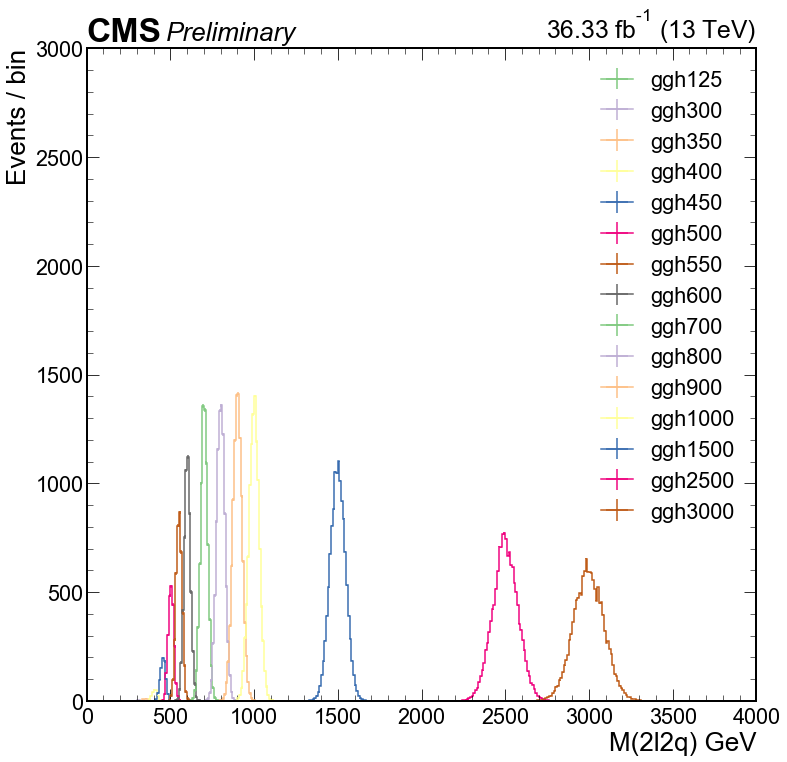

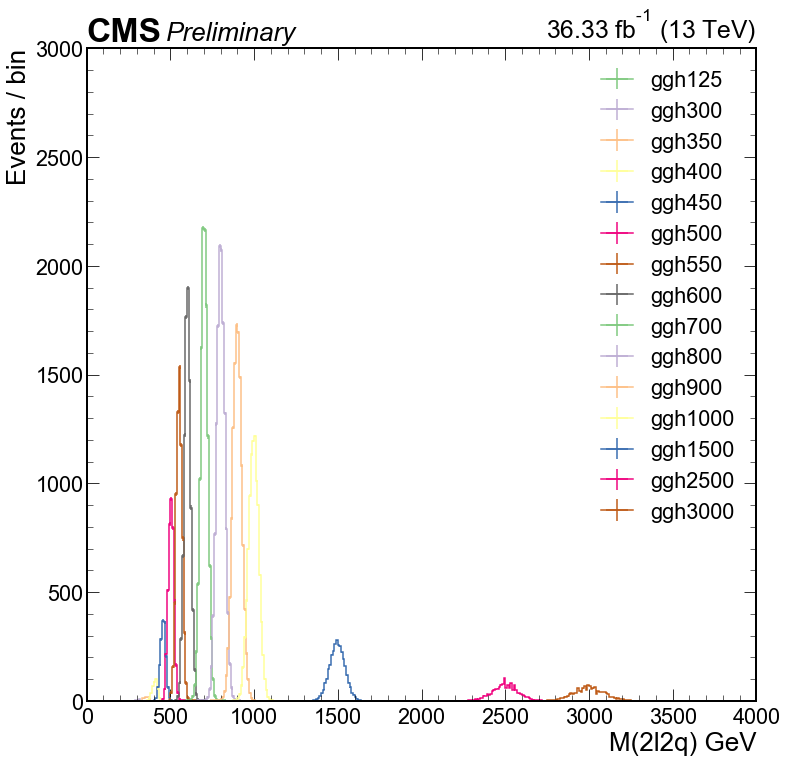

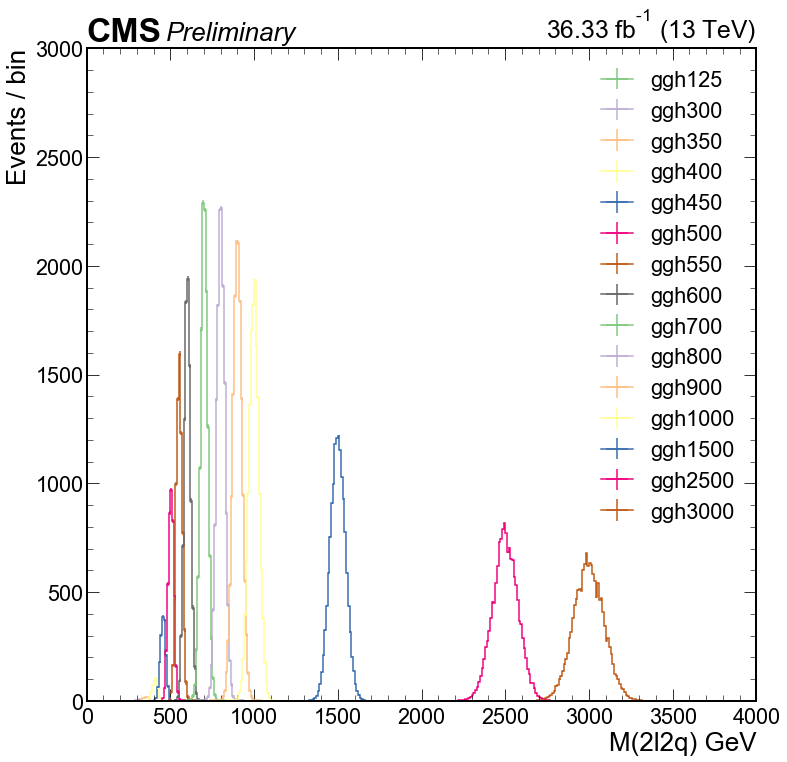

In [17]:
nSample = len(samples)
sig_hist_reshape = {}
#width = 100
for case in selections.keys():
    sig_hist_reshape[case]=[]
    for i,sample in enumerate(samples):
        sig_hist_reshape[case].append(sig_hist_cut[case][i]) #sig_hist_cut = Reco_sig_with_selections
        #if(massList[i]>700): #reshape if mass lager than 700
        #    re_weight = reshape(sig_hist[i],massList[i],width) #sig_hist = GEN_sig_hist_withoutCut
        #    sig_hist_reshape[case][i].view().value = (sig_hist_reshape[case][i].view().value)*re_weight
        if(massList[i]>200): #reshape if mass lager than 700
            width = massList[i]*0.03
            re_weight = reshape(sig_hist[i],massList[i],width) #sig_hist = GEN_sig_hist_withoutCut
            sig_hist_reshape[case][i].view().value = (sig_hist_reshape[case][i].view().value)*re_weight

    ######plot reshaped reco-plot
    f = plt.figure(figsize=(12,12))
    ax = f.add_subplot()
    hep.cms.label(data=True, llabel='Preliminary',year=year,rlabel=r'%s $fb^{-1}$ (13 TeV)'%config['lumi'][year], fontname='sans-serif')
    ax.set_xlim(xmin, xmax); ax.set_ylabel('Events / bin', ha='right', y=1.0)
    ax.set_xlabel(r'M(2l2q) GeV', ha='right', x=1.0)
    plot_hist(sig_hist_reshape[case],label=[ var for var in samples])
    ax.set_ylim(0, 3000)
    plt.legend()
    plt.savefig(f'./plots/{year}/recoReshaped_m2l2q_{case}.png')
    print('[INFO] DONE')

In [18]:
plt.close()

In [19]:
with uproot.recreate('Histos_sig.root') as f:
    for case in selections.keys():
        for i,sample in enumerate(samples):
            f[f'{sample}_{case}'] = sig_hist_reshape[case][i]
    

# Get Eff for different catgory

In [20]:
#regions = ['CR','SR']
#samples = ['ggh500','ggh600','ggh700','ggh800','ggh900','ggh1000','ggh1500','ggh2500','ggh3000']
region = "SR"
tags = ['btag','untag','vbftag']
channels = ['isEE','isMuMu','2lep']
cases = ['merged','resolved']
pro_str = 'spin0_ggH'
chanName = {'isEE':'eeqq','isMuMu':'mumuqq','2lep':'llqq'}
caseName = {'merged':"Merged",'resolved':"Resolved"}
tagName = {'btag':'b-tagged','untag':'untagged','vbftag':'vbf-tagged'}


In [21]:
from array import array

In [22]:
sig_arr_cut = {}
sig_hist_cut = {}
eff = {}
eff_GraphY = {}; eff_GraphYerr = array('f',[])
eff_graph = {}
#samples = ['ggh500']; channels = ['2lep']
for channel in channels:
    sig_arr_cut[channel] = {}; sig_hist_cut[channel]={}; eff[channel] = {}; eff_GraphY[channel] = {}; eff_graph[channel] = {}
    for case in cases:
        if case=='merged':
            massZZ = 'mass2lj'
        elif case=='resolved':
            massZZ = 'mass2l2jet'
        sig_arr_cut[channel][case] = {}; sig_hist_cut[channel][case] = {}; eff[channel][case] = {}; eff_GraphY[channel][case] = {}; eff_graph[channel][case]={}
        for tag in tags:
            sig_arr_cut[channel][case][tag] = {}; sig_hist_cut[channel][case][tag] = []; eff[channel][case][tag] = {}; eff_GraphY[channel][case][tag] = array('f',[]); eff_graph[channel][case][tag]=None
            for i,sample in enumerate(samples):
                #print(f'[INFO] This is {channel} {case} {tag} in {sample}')
                selection = config['cut'][region][channel][case][tag]
                cut_array = ak.numexpr.evaluate(selection,sig_arr[sample])
                sig_arr_cut[channel][case][tag][sample] = sig_arr[sample][cut_array]
                weights = (sig_arr_cut[channel][case][tag][sample]['EventWeight']*config['lumi'][year]*config['samples_inf'][sample][1]*1000)/sumWeight[sample]
                temp_hist = get_hist(sig_arr_cut[channel][case][tag][sample][massZZ],weights,nbins,xmin,xmax)
                sig_hist_cut[channel][case][tag].append(temp_hist)
                ######calculate eff
                temp_hist_unweight = get_hist(sig_arr_cut[channel][case][tag][sample][massZZ],ak.ones_like(sig_arr_cut[channel][case][tag][sample]['EventWeight']),nbins,xmin,xmax)
                #print(f'[INFO] sum of events after applying selections in {channel} {case} {tag} {sample} = {temp_hist_unweight.view().value.sum()}')
                #print(f'[INFO] sum of events after applying selections and weight in {channel} {case} {tag} {sample} = {temp_hist.view().value.sum()}')
                #print(f'[INFO] sum of events in GEN level in {sample} = {sig_hist_dir[sample].view().value.sum()}')
                #print(f'[INFO] ')
                if(massList[i]>0): #reshape if mass lager than 700
                    width = massList[i]*0.03
                    re_weight = reshape(sig_hist[i],massList[i],width) #sig_hist = GEN_sig_hist_withoutCut
                    temp_hist_unweight.view().value = (temp_hist_unweight.view().value)*re_weight
                reco_number = temp_hist_unweight.view().value.sum()
                gen_number = sig_hist_dir[sample].view().value.sum()
                eff[channel][case][tag][sample] = (temp_hist_unweight.view().value.sum())/(sig_hist_dir[sample].view().value.sum())
                eff[channel][case][tag][sample] = reco_number/gen_number
                eff_GraphY[channel][case][tag].append(eff[channel][case][tag][sample]); eff_GraphYerr.append(0.0)
                print(f'eff = {eff[channel][case][tag][sample]} in {channel} {case} {tag} in {sample}')

/tmp/ipykernel_22630/1924718592.py:4: RuntimeWarning: divide by zero encountered in true_divide
  reshape_weight = h.view()/histo.view().value
/tmp/ipykernel_22630/1924718592.py:4: RuntimeWarning: invalid value encountered in true_divide
  reshape_weight = h.view()/histo.view().value


eff = 0.0 in isEE merged btag in ggh125
eff = 3.211356310787459e-05 in isEE merged btag in ggh300
eff = 0.00035072601167137203 in isEE merged btag in ggh350
eff = 0.0015365104222162342 in isEE merged btag in ggh400
eff = 0.005105123732018789 in isEE merged btag in ggh450
eff = 0.014100984249137478 in isEE merged btag in ggh500
eff = 0.022798729360310726 in isEE merged btag in ggh550
eff = 0.026976028582912124 in isEE merged btag in ggh600
eff = 0.03451309803682852 in isEE merged btag in ggh700
eff = 0.04014970036787495 in isEE merged btag in ggh800
eff = 0.04400771553933615 in isEE merged btag in ggh900
eff = 0.0465602222785217 in isEE merged btag in ggh1000
eff = 0.049028397719423245 in isEE merged btag in ggh1500
eff = 0.04621502754779099 in isEE merged btag in ggh2500
eff = 0.038718562829861795 in isEE merged btag in ggh3000
eff = 0.0 in isEE merged untag in ggh125
eff = 0.00019479314082166194 in isEE merged untag in ggh300
eff = 0.0005293728591579539 in isEE merged untag in ggh350


In [23]:
import ROOT

Welcome to JupyROOT 6.26/00


In [33]:
#create TGaph for store and fro Fit 
MultiGraph = {}
eff_graph = {}
eff_graphX = array('f',massList); eff_graphXerr = array('f',[0,0,0,0,0,0,0,0,0,0,0,0,0,0])
colorList = [ROOT.EColor.kGreen,ROOT.EColor.kYellow+2,ROOT.EColor.kRed,ROOT.EColor.kMagenta,ROOT.EColor.kBlue,ROOT.EColor.kCyan]
fit_fun = ROOT.TF1('pol11','[0]+[1]*x+[2]*x^2+[3]*x^3+[4]*x^4+[5]*x^5+[6]*x^6+[7]*x^7+[8]*x^8+[9]*x^9+[10]*x^10+[11]*x^11',0,4000)
fit_fun.SetParameters()
outfile = ROOT.TFile("./2l2q_Efficiency_spin0_ggH.root",'recreate'); outfile.cd()
for channel in channels:
    c = ROOT.TCanvas('c','c',800,800)
    eff_graph[channel] = {}; MultiGraph[channel] = ROOT.TMultiGraph()
    leg = ROOT.TLegend( .64, .65, .97, .85 )
    i = 0
    for case in cases:
        eff_graph[channel][case] = {}
        for tag in tags:
            print(f'[INFO] this eff in  {channel}_{case}_{tag} = {eff_GraphY[channel][case][tag]}')
            eff_graph[channel][case][tag] = ROOT.TGraphErrors(len(eff_graphX),eff_graphX,eff_GraphY[channel][case][tag],eff_graphXerr,eff_GraphYerr)
            MultiGraph[channel].Add(eff_graph[channel][case][tag],'PL')
            eff_graph[channel][case][tag].SetLineColor(colorList[i]) ; i +=1
            #eff_graph[channel][case][tag].SetLineStyle(0)
            eff_graph[channel][case][tag].SetMarkerSize(1)
            eff_graph[channel][case][tag].SetMarkerStyle(20)
            leg.AddEntry(eff_graph[channel][case][tag],f'{channel}_{case}_{tag}',"l")
            #fit
            #eff_graph[channel][case][tag].Fit("pol4","qw")
            eff_graph[channel][case][tag].Fit(fit_fun,"qw")
            eff_graph[channel][case][tag].Write(f'{pro_str}_{chanName[channel]}_{caseName[case]}_{tagName[tag]}')


    MultiGraph[channel].Draw("A pmc plc")
    MultiGraph[channel].GetXaxis().SetTitle('M_2l2q [GeV]')
    MultiGraph[channel].GetYaxis().SetTitle("eff*acc"); MultiGraph[channel].GetYaxis().SetTitleSize(0.025)
    MultiGraph[channel].SetTitle(f'Channel {channel}')
    leg.Draw()
    c.SaveAs(f'./plots/2016/eff_{channel}.png')
    c.Close()

outfile.Write(); outfile.Close()



[INFO] this eff in  isEE_merged_btag = array('f', [0.0, 3.211356306564994e-05, 0.0003507260116748512, 0.001536510419100523, 0.005105123855173588, 0.014100984670221806, 0.022798730060458183, 0.026976028457283974, 0.03451309725642204, 0.04014969989657402, 0.044007714837789536, 0.046560220420360565, 0.04902839660644531, 0.04621502757072449, 0.038718562573194504])
[INFO] this eff in  isEE_merged_untag = array('f', [0.0, 0.00019479314505588263, 0.0005293728318065405, 0.002912200754508376, 0.01045698020607233, 0.029368748888373375, 0.05044896528124809, 0.06731865555047989, 0.09091689437627792, 0.10539984703063965, 0.11730322241783142, 0.12541532516479492, 0.15481635928153992, 0.18768779933452606, 0.1947639286518097])
[INFO] this eff in  isEE_merged_vbftag = array('f', [0.0, 3.51472626789473e-05, 0.00013608418521471322, 0.00045134685933589935, 0.0012278424110263586, 0.0016697491519153118, 0.0025237638037651777, 0.003700963919982314, 0.006123672239482403, 0.00684825424104929, 0.007755490951240

Info in <TCanvas::Print>: png file ./plots/2016/eff_isEE.png has been created
Info in <TCanvas::Print>: png file ./plots/2016/eff_isMuMu.png has been created
Info in <TCanvas::Print>: png file ./plots/2016/eff_2lep.png has been created


In [29]:
c.Close()

In [22]:
sig_hist_cut['2lep']['merged']['btag'][0].view().value.sum()

909.8102118782699

In [23]:
sig_hist_dir['ggh500'].view().value.sum()

130330.0

In [24]:
eff['2lep']['merged']['btag']['ggh500']

0.0